---
## 1. Selenium을 실행하여 티스토리 메인 홈페이지로 이동

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
driver.get("https://www.tistory.com")




---
## 2. BeautifulSoup을 통해 html 정보 가져오고, 상위 5개 인기글 제목 출력

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import time

# 1. Selenium을 사용해 티스토리 메인 페이지 접속
driver = webdriver.Chrome()
driver.get("https://www.tistory.com")

# 2. 페이지의 HTML 가져오기
html_content = driver.page_source

# 3. BeautifulSoup으로 HTML 파싱
soup = BeautifulSoup(html_content, 'html.parser')

# 4. 상위 5개 인기 글 제목 추출 (tit_g 클래스 기반)
popular_titles = soup.select('div.best_popularity strong.tit_g')

# 5. 상위 5개 제목 출력
print("상위 5개 인기 글 제목:")
for idx, title in enumerate(popular_titles[:5], 1):
    print(f"{idx}. {title.get_text(strip=True)}")

# 6. 브라우저 종료
driver.quit()


상위 5개 인기 글 제목:
1. CU 급식대가 비빔만두 솔직 후기 : 가격과 양이 이게 맞아? - 내돈내산 리뷰
2. 족발 데울 때 이거 모르면 손해! 처음보다 더 맛있어져요
3. 진정한 인싸 인정!
4. 가성비 한 끼 식사 '한솥도시락' 신메뉴 3종 내돈내산 후기
5. 방학 아이와 가볼만한 곳 돈의문 박물관 마을


---
## 3. 인공지능 정보 검색, 데이터프레임으로 정보 저장

In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import time

# 1. Selenium 브라우저 열기
driver = webdriver.Chrome()
driver.get("https://www.tistory.com")

# 2. 검색어 입력 및 검색 실행
search_box = driver.find_element(By.CSS_SELECTOR, 'div.inner_search input[type="text"]')
search_box.send_keys("인공지능")
search_button = driver.find_element(By.CSS_SELECTOR, 'button.btn_search')
search_button.click()

# 3. 페이지 로딩 대기
time.sleep(5)

# 4. HTML 가져오기
html_content = driver.page_source
soup = BeautifulSoup(html_content, 'html.parser')

# 5. 데이터 추출
authors = soup.select('div.wrap_profile span.txt_g')
titles = soup.select('strong.tit_cont')
likes = soup.select('span.ico_like + span.txt_g')
comments = soup.select('span.ico_cmt + span.txt_g')
dates = [span for span in soup.select('span.txt_g') if "." in span.get_text(strip=True)] 

# 6. 상위 10개 데이터 저장
data = []
for i in range(min(10, len(titles))):
    data.append({
        "제목": titles[i].get_text(strip=True),
        "작성자": authors[i].get_text(strip=True),
        "좋아요": likes[i].get_text(strip=True),
        "댓글수": comments[i].get_text(strip=True),
        "작성일": dates[i].get_text(strip=True),
    })

# 7. 데이터프레임 생성
df = pd.DataFrame(data)

# 8. 출력
print("상위 10개의 검색 결과:")
print(df)

# 9. 브라우저 종료
driver.quit()


상위 10개의 검색 결과:
                              제목                      작성자 좋아요 댓글수         작성일
0              인공지능챗봇 종류 7가지와 특징                Hot issue   3   2  2024.12.18
1                    인공지능관련주 7종목              outsight129   3   0  2024.11.18
2             인공지능(AI)은 어떻게 만들까?                 어떻게 만들까?  19  40  2024.11.26
3  인공지능(AI)이란? 기초부터 쉽게 배우는 가이드 🤖                     IT조아  40  30  2024.12.21
4                AI인공지능시대 생애설계 1  경제적 자유 거룩한 삶 나의 꿈 나의 인생   4   3  2024.11.19
5                        생성형인공지능                 누구야 티스토리   3   3  2024.11.27
6   AI인공지능관련주 정리 (대장주, 테마주, 수혜주)          주식, 부동산, 경제 나눔소   5   3  2024.12.15
7           AI인공지능관련주 TOP10 총정리!              경제 분야 크리에이터   4   2  2024.12.23
8                ai인공지능관련주 TOP10              outsight140   2   0  2024.10.24
9             데이터 기반인공지능혁신 사례 분석                     머니 백   6   4  2024.11.17


In [8]:
df


,제목,작성자,좋아요,댓글수,작성일
0,인공지능챗봇 종류 7가지와 특징,Hot issue,3,2,2024.12.18
1,인공지능관련주 7종목,outsight129,3,0,2024.11.18
2,인공지능(AI)은 어떻게 만들까?,어떻게 만들까?,19,40,2024.11.26
3,인공지능(AI)이란? 기초부터 쉽게 배우는 가이드 🤖,IT조아,40,30,2024.12.21
4,AI인공지능시대 생애설계 1,경제적 자유 거룩한 삶 나의 꿈 나의 인생,4,3,2024.11.19
5,생성형인공지능,누구야 티스토리,3,3,2024.11.27
6,"AI인공지능관련주 정리 (대장주, 테마주, 수혜주)","주식, 부동산, 경제 나눔소",5,3,2024.12.15
7,AI인공지능관련주 TOP10 총정리!,경제 분야 크리에이터,4,2,2024.12.23
8,ai인공지능관련주 TOP10,outsight140,2,0,2024.10.24
9,데이터 기반인공지능혁신 사례 분석,머니 백,6,4,2024.11.17


---
## 4. 자료형 변경 및 시각화

자료형 확인:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      10 non-null     object
 1   작성자     10 non-null     object
 2   좋아요     10 non-null     int64 
 3   댓글수     10 non-null     int64 
 4   작성일     10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes
None

자료형 변환 후 확인:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      10 non-null     object
 1   작성자     10 non-null     object
 2   좋아요     10 non-null     int64 
 3   댓글수     10 non-null     int64 
 4   작성일     10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes
None

좋아요 상위 5개 데이터:
               작성자  좋아요  댓글수
3             IT조아   40   30
2         어떻게 만들까?   19   40
9             머니 백    6    4
6  주식, 부동산, 경제 나눔소  

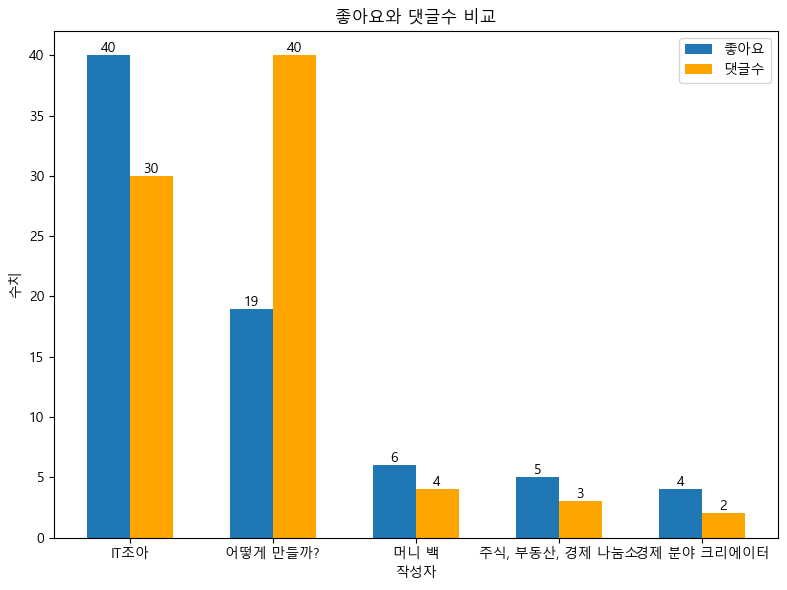

In [16]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


# 1. 데이터프레임의 자료형 확인
print("자료형 확인:")
print(df.info())

# 2. 자료형 변환
df["좋아요"] = df["좋아요"].astype(int)
df["댓글수"] = df["댓글수"].astype(int)

print("\n자료형 변환 후 확인:")
print(df.info())

# 3. 좋아요 상위 5개 데이터 추출
top_likes = df.sort_values(by="좋아요", ascending=False).head(5)[["작성자", "좋아요", "댓글수"]]
print("\n좋아요 상위 5개 데이터:")
print(top_likes)

# 4. 시각화
plt.figure(figsize=(8, 6))
bar_width = 0.3
x = range(len(top_likes))

bars1 = plt.bar(x, top_likes["좋아요"], width=bar_width, label="좋아요")
bars2 = plt.bar([i + bar_width for i in x], top_likes["댓글수"], width=bar_width, label="댓글수", color="orange")

# x축 및 그래프 설정
plt.xticks([i + bar_width / 2 for i in x], top_likes["작성자"], rotation=0) 
plt.xlabel("작성자")
plt.ylabel("수치")
plt.title("좋아요와 댓글수 비교")
plt.legend()
plt.tight_layout()  

# 그래프에 숫자 레이블 추가
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

# 그래프 출력
plt.show()


---
## 5. 티스토리 자동 페이지 넘기기

In [17]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

# 1. Selenium 브라우저 열기
driver = webdriver.Chrome()
driver.get("https://www.tistory.com")

# 2. 검색창에 'Python' 입력 및 검색 실행
search_box = driver.find_element(By.CSS_SELECTOR, 'div.inner_search input[type="text"]')
search_box.send_keys("Python")
search_button = driver.find_element(By.CSS_SELECTOR, 'button.btn_search')
search_button.click()

# 3. 페이지 로딩 대기
time.sleep(5)

# 4. 5페이지까지 자동 이동
current_page = 1
while current_page <= 5:
    try:
        print(f"{current_page}페이지로 이동")
        
        # 페이지 이동을 위한 <a> 태그 클릭
        page_link = driver.find_element(By.CSS_SELECTOR, f".wrap_paging_tistory .link_paging:nth-child({current_page + 1})")
        page_link.click()
        
        time.sleep(3)  
        current_page += 1
    except Exception as e:
        print("다음 페이지를 찾을 수 없습니다. 탐색 종료:", e)
        break


# 5. 브라우저 종료
driver.quit()


1페이지로 이동
2페이지로 이동
3페이지로 이동
4페이지로 이동
5페이지로 이동


---
## 6. 글 정보 수집 기능 추가

In [18]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

# WebDriver 설정
driver = webdriver.Chrome()
driver.get("https://www.tistory.com/") 

try:
    # 1. 검색창 대기 및 입력
    wait = WebDriverWait(driver, 10)
    search_input = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, ".inp_text input")))
    search_input.send_keys("Python") 
    
    # 2. 검색 버튼 클릭
    search_button = driver.find_element(By.CSS_SELECTOR, ".btn_search")
    search_button.click()
    time.sleep(3)  
except Exception as e:
    print("검색 중 오류 발생:", e)
    driver.quit()

# 데이터 저장 리스트
data = []

# 3. 1~5페이지 자동 이동 및 데이터 수집
current_page = 1
while current_page <= 5:
    try:
        print(f"{current_page}페이지로 이동")
        
        # 글 정보 수집
        posts = driver.find_elements(By.CSS_SELECTOR, ".item_group")
        for post in posts:
            try:
                # 글 제목
                title = post.find_element(By.CSS_SELECTOR, ".tit_cont").text.strip()
                
                # 작성자
                author = post.find_element(By.CSS_SELECTOR, ".wrap_profile .txt_g").text.strip()
                
                # 좋아요 수
                likes = post.find_element(By.CSS_SELECTOR, ".btn_info .ico_like + .txt_g").text.strip()
                
                # 댓글 수
                comments = post.find_element(By.CSS_SELECTOR, ".btn_info .ico_cmt + .txt_g").text.strip()
                
                # 작성일
                date = post.find_element(By.CSS_SELECTOR, ".wrap_info .txt_g:last-child").text.strip()
                
                # 데이터 추가
                data.append({
                    "제목": title,
                    "작성자": author,
                    "좋아요": likes,
                    "댓글수": comments,
                    "작성일": date,
                })
            except Exception as e:
                print(f"글 정보를 가져오는 중 오류 발생: {e}")
        
        # 다음 페이지로 이동
        if current_page < 5:
            next_page = driver.find_element(By.CSS_SELECTOR, f".wrap_paging_tistory .link_paging:nth-child({current_page + 2})")
            next_page.click()
            time.sleep(3) 
        
        current_page += 1
    except Exception as e:
        print("페이지 이동 중 오류 발생:", e)
        break

driver.quit()

# 4. 데이터프레임 저장
df = pd.DataFrame(data)
print(df)


1페이지로 이동
2페이지로 이동
3페이지로 이동
4페이지로 이동
5페이지로 이동
                                                 제목               작성자 좋아요 댓글수  \
0                                     python Pandas  js-dowill 님의 블로그   0   2   
1                                    [Python] 환경 설정            멍멍이발기록   0   0   
2           [파이썬] Python 설치하기 (윈도우 10, 최신버전 3.13.1)  Plug & Play Life   4   7   
3                      [Python] Django 투표 앱 만들기 (1)             Doodo   1   1   
4    python - interview questions (Turing) Q1 ~ Q10        monsangter   1   1   
..                                              ...               ...  ..  ..   
145                   [Python] 코딩테스트 준비하기 (하루 10문제)             공부 기록   0   0   
146                          [Python] 콘텐츠 기반 추천 시스템          짜리몽땅 매거진   0   2   
147                      코드로 알아보는 python event loop          허서기의 블로그   2   1   
148              [Python] FastAPI: 현대적이고 빠른 웹 프레임워크         피터의 개발이야기   0   0   
149                  Upstage AI Lab 6기 Python 강의 후기     jyun34 님

In [19]:
df

,제목,작성자,좋아요,댓글수,작성일
0,python Pandas,js-dowill 님의 블로그,0,2,0
1,[Python] 환경 설정,멍멍이발기록,0,0,0
2,"[파이썬] Python 설치하기 (윈도우 10, 최신버전 3.13.1)",Plug & Play Life,4,7,4
3,[Python] Django 투표 앱 만들기 (1),Doodo,1,1,1
4,python - interview questions (Turing) Q1 ~ Q10,monsangter,1,1,1
...,...,...,...,...,...
145,[Python] 코딩테스트 준비하기 (하루 10문제),공부 기록,0,0,0
146,[Python] 콘텐츠 기반 추천 시스템,짜리몽땅 매거진,0,2,0
147,코드로 알아보는 python event loop,허서기의 블로그,2,1,2
148,[Python] FastAPI: 현대적이고 빠른 웹 프레임워크,피터의 개발이야기,0,0,0
